In [122]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np

In [123]:
l = ltspice.Ltspice('Ubernahmeverzerrungen_1kLast.raw')
l.parse()

In [124]:
t = l.getTime()
V_basis = l.getData('V(basis)')
V_Last = l.getData('V(last)')

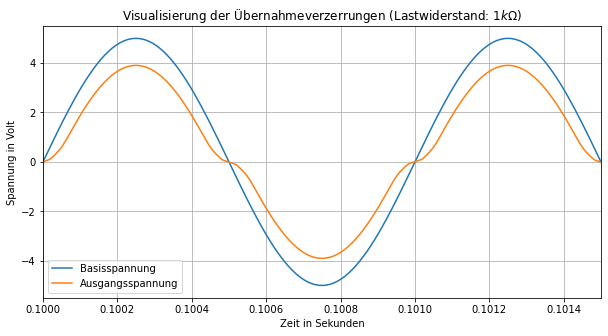

In [125]:
plt.figure(figsize = (10,5))
plt.plot(t, V_basis, label ='Basisspannung')
plt.plot(t, V_Last, label ='Ausgangsspannung')
plt.xlim(0.1, 0.1015)
plt.ylabel('Spannung in Volt')
plt.xlabel('Zeit in Sekunden')
plt.grid(True)
plt.legend()
plt.title(r'Visualisierung der Übernahmeverzerrungen (Lastwiderstand: $1k \Omega$)')
plt.savefig('Übernahmeverzerrungen.pdf', bbox_inches = 'tight')
plt.show()

In [154]:
from IPython.display import Audio
Audio(np.tile(V_Last,1), rate=99999)

In [153]:
Audio(np.sin(1000*2*np.pi*t), rate=99999)

In [141]:
np.tile(np.array([1,2,3]),2)

array([1, 2, 3, 1, 2, 3])

In [90]:
import pandas as pd

In [91]:
df = pd.read_csv('Ubernahmeverzerrungen_fft.txt', header = 0, names = ['freg','V_last'], sep='\t')
df

,freg,V_last
0,0.0,"2.05816422050468e-003,0.00000000000000e+000"
1,2.0,"-5.53401006781184e-007,7.23295710982872e-009"
2,4.0,"-5.44247173693834e-007,1.53888741610574e-008"
3,6.0,"-5.44370437141828e-007,1.83493361917999e-008"
4,8.0,"-6.23854612969921e-007,-8.45987784295343e-010"
...,...,...
131067,262134.0,"-3.02887120756728e-008,-4.18496083451707e-010"
131068,262136.0,"-3.30346252272348e-008,-1.43109946767188e-009"
131069,262138.0,"-3.58249541746251e-008,-1.72638245288869e-009"
131070,262140.0,"-5.71874912094468e-008,2.67959643151115e-009"


In [92]:
df.apply()

TypeError: apply() missing 1 required positional argument: 'func'

In [93]:
def parseAmp():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-93-3018ce221173>, line 2)

In [94]:
[float(x) for x in df['V_last'][0].split(',')]

[0.00205816422050468, 0.0]

In [95]:
[x[0] for x in [float(x) for x in df['V_last'][0].split(',')]]

TypeError: 'float' object is not subscriptable

In [96]:
amps = [20*np.log10((float(x[0])**2+float(x[1])**2)**.5)  for x in [x.split(',') for x in df['V_last']]]

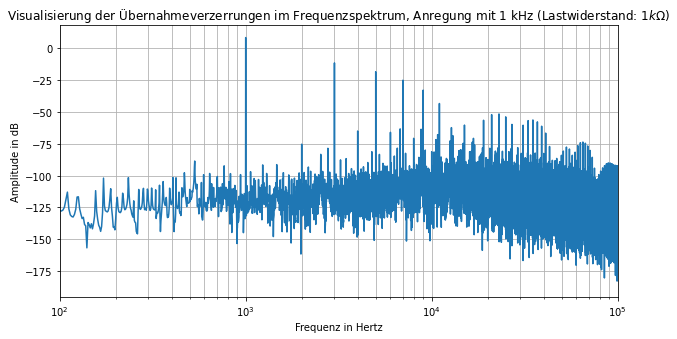

In [121]:
plt.figure(figsize = (10,5))
plt.semilogx(df['freg'], amps)
plt.xlim(100, 100000)
plt.ylabel('Amplitude in dB')
plt.xlabel('Frequenz in Hertz')
plt.grid(True, which = 'both')
plt.title(r'Visualisierung der Übernahmeverzerrungen im Frequenzspektrum, Anregung mit 1 kHz (Lastwiderstand: $1k \Omega$)')
plt.savefig('Übernahmeverzerrungen_fft.pdf', bbox_inches = 'tight')
plt.show()

In [100]:
df['freg']

0              0.0
1              2.0
2              4.0
3              6.0
4              8.0
            ...   
131067    262134.0
131068    262136.0
131069    262138.0
131070    262140.0
131071    262142.0
Name: freg, Length: 131072, dtype: float64